In [1]:
import numpy as np
import shutil

In [2]:
path = '/home/simon/Music'
if os.path.isdir(path) == True:
    #shutil.rmtree(path)
    print(True)

True


In [3]:
def get_annotation_path(img_dir):

    """Creates a list of all box paths."""

    annotation_list = []

    for filename in os.listdir(img_dir):
        if filename.split('.')[1] == 'xml':
            annotation_list.append(filename)

    return(annotation_list)

def get_train_test(annotation_list, train_ratio = 0.8):

    train_n = int(len(annotation_list) * train_ratio)
    train_set = np.random.choice(annotation_list, train_n, replace = False)
    test_set = [i for i in annotation_list if i not in train_set]

    return(train_set, test_set)

In [4]:
img_dir = '/home/simon/Documents/Bodies/data/jeppe/images'

annotation_list = get_annotation_path(img_dir) # new
train_set, test_set = get_train_test(annotation_list) 

In [5]:
print(len(annotation_list))
print(len(train_set))
print(len(test_set))
print(set(test_set).intersection(set(train_set)))

1007
805
202
set()


In [ ]:
# hist of object distribution - both total objects and images containing object (binary)...





In [34]:
   for filename in os.listdir(img_dir)[:2]:
       if filename.split('.')[1] == 'xml': # only for annotated images. filename is now effectively annotationes.

            img_name = filename.split('.')[0] + '.jpg'
            img_path = os.path.join(img_dir, img_name)

            print(filename)
            img_name = filename.split('.')[0] + '.jpg' 
            print(img_name)
            img_path = os.path.join(img_dir, img_name)
            print(img_path)
                
            print('\n')     


JS81070.xml
JS81070.jpg
/home/simon/Documents/Bodies/data/jeppe/images/JS81070.jpg




In [36]:
train = False

if train == True:
    subset = train_set
    
elif train == False:
    subset = test_set

print(len(subset))

for filename in subset:
    print(filename)
    img_name = filename.split('.')[0] + '.jpg' 
    print(img_name)
    img_path = os.path.join(img_dir, img_name)
    print(img_path)
        
    print('\n')    

202
JS81070.xml
JS81070.jpg
/home/simon/Documents/Bodies/data/jeppe/images/JS81070.jpg


JS18167.xml
JS18167.jpg
/home/simon/Documents/Bodies/data/jeppe/images/JS18167.jpg


JS71197.xml
JS71197.jpg
/home/simon/Documents/Bodies/data/jeppe/images/JS71197.jpg


JS24701.xml
JS24701.jpg
/home/simon/Documents/Bodies/data/jeppe/images/JS24701.jpg


JS16621.xml
JS16621.jpg
/home/simon/Documents/Bodies/data/jeppe/images/JS16621.jpg


JS1928.xml
JS1928.jpg
/home/simon/Documents/Bodies/data/jeppe/images/JS1928.jpg


JS5653.xml
JS5653.jpg
/home/simon/Documents/Bodies/data/jeppe/images/JS5653.jpg


JS19466.xml
JS19466.jpg
/home/simon/Documents/Bodies/data/jeppe/images/JS19466.jpg


JS33225.xml
JS33225.jpg
/home/simon/Documents/Bodies/data/jeppe/images/JS33225.jpg


JS2169.xml
JS2169.jpg
/home/simon/Documents/Bodies/data/jeppe/images/JS2169.jpg


JS41208.xml
JS41208.jpg
/home/simon/Documents/Bodies/data/jeppe/images/JS41208.jpg


JS14327.xml
JS14327.jpg
/home/simon/Documents/Bodies/data/jeppe/images

In [15]:
x = list(np.arange(0,100))

np.random.seed(42)
ratio 
train = np.random.choice(x, 10, replace = False)
test = [i for i in x if i not in train]

print(len(x))
print(len(train))
print(len(test))
print(set(test).intersection(set(train)))

100
10
90
set()


In [3]:
import pickle
from detectron2.structures import BoxMode
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

from Turtorial1_utils import *
import cv2
import random

import matplotlib.pyplot as plt

img_dir = '/home/simon/Documents/Bodies/data/jeppe/images'
dataset_dicts = get_img_dicts(img_dir)
#dataset_dicts =  pickle.load(open("Turtorial_dataset_dicts.pkl", "rb" )) # why does this give an error?

classes, _, _ = get_classes(img_dir)

In [17]:
#DatasetCatalog.register("my_data", lambda: get_img_dicts(img_dir))
#MetadataCatalog.get("my_data").set(thing_classes=classes)
MetadataCatalog.get("my_data").thing_classes=classes
my_data_metadata = MetadataCatalog.get("my_data")

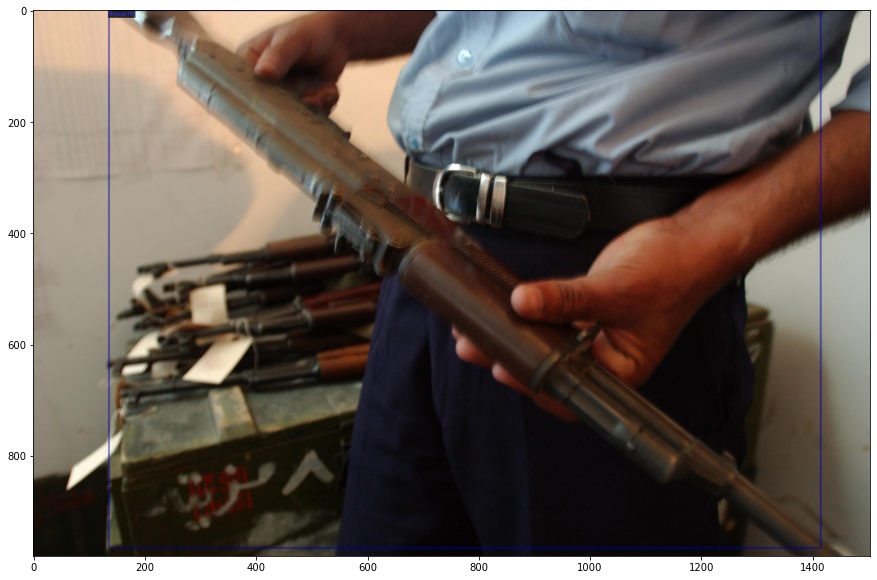

In [18]:
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_data_metadata, scale=0.5)
    out = visualizer.draw_dataset_dict(d)
    viz_img = out.get_image()[:, :, ::-1]

plt.figure(figsize= [15,15])
plt.imshow(viz_img)
plt.show()